"C:\Users\Hp\Desktop\Pakistan Largest Ecommerce Dataset.csv"

# BI MIDTERM

- I wrote this short code as an explanation to how I did data cleaning and transformation in PowerBI. It made me realize that Python is more of a Powerful tool for data cleaning, I would have expanded on it further for data cleaning by using the template I created for data wrangling, but it is not a part of the midterm assignment.

- I also made a correlational map which would allow me to make proper charts in PowerBI 

In [2]:
#imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import csv
from sklearn.impute import SimpleImputer
import warnings
import statsmodels.api as sm  
from statsmodels.formula.api import ols  
import random as r
from datetime import datetime
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [18]:
#uploading csv file
df = pd.read_csv (r'C:\Users\Hp\Desktop\Pakistan Largest Ecommerce Dataset.csv')
#checking what kind of columns are we dealing with
df.head()

C:\Users\Hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [19]:
#checking data types
df.dtypes

item_id                  float64
status                    object
created_at                object
sku                       object
price                    float64
qty_ordered              float64
grand_total              float64
increment_id              object
category_name_1           object
sales_commission_code     object
discount_amount          float64
payment_method            object
Working Date              object
BI Status                 object
 MV                       object
Year                     float64
Month                    float64
Customer Since            object
M-Y                       object
FY                        object
Customer ID              float64
Unnamed: 21              float64
Unnamed: 22              float64
Unnamed: 23              float64
Unnamed: 24              float64
Unnamed: 25              float64
dtype: object

In [20]:
#checking data shape
df.shape

(1048575, 26)

In [21]:
#checking for null values
df.isnull().sum()

item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601226
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

In [22]:
#further information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [23]:
#dropping null values since it does not affect the overall data and there are restrictions in PowerBI
df=df.dropna(how='all')

In [24]:
#rechecking for null values
df.isnull().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137175
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
Unnamed: 21              584524
Unnamed: 22              584524
Unnamed: 23              584524
Unnamed: 24              584524
Unnamed: 25              584524
dtype: int64

In [25]:
#dropping last columns since they are empty
df = df.iloc[:, :-5]

In [26]:
#changing data types
df['item_id']=df['item_id'].astype(int)
df['Customer ID']=df['Customer ID'].astype(str)
df['qty_ordered']=df['qty_ordered'].astype(int)
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)

In [27]:
#renaming some columns
df.rename(columns={'sku':'Description'},inplace=True)
df.rename(columns={'category_name_1':'Category'},inplace=True)
df.rename(columns={'category_name_1':'Category'},inplace=True)
df.rename(columns={' MV ':'MV'},inplace=True)

In [28]:
#checking column names
df.columns

Index(['item_id', 'status', 'created_at', 'Description', 'price',
       'qty_ordered', 'grand_total', 'increment_id', 'Category',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

In [29]:
df['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', nan, 'processing', 'payment_review'],
      dtype=object)

In [32]:
df.replace(to_replace =["order_refunded", "exchange","nan"],
                 value ="refund")
df.replace(to_replace =["closed", "received","closed","cod","paid"],
                 value ="complete")
df.replace(to_replace =["holded", "pending_paypal","processing","payment_review"],
                 value ="pending")

,item_id,status,created_at,Description,price,qty_ordered,grand_total,increment_id,Category,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131,complete,7/1/2016,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016,7,2016-7,7-2016,FY17,1.0
1,211133,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016,7,2016-7,7-2016,FY17,2.0
2,211134,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016,7,2016-7,7-2016,FY17,3.0
3,211135,complete,7/1/2016,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016,7,2016-7,7-2016,FY17,4.0
4,211136,order_refunded,7/1/2016,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016,7,2016-7,7-2016,FY17,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1,849.0,100562385,Women's Fashion,NaN,...,cod,8/28/2018,Valid,699,2018,8,2018-8,8-2018,FY19,115320.0
584520,905205,pending,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1,35899.0,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"35,599",2018,8,2018-8,8-2018,FY19,115326.0
584521,905206,pending,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"259,998",2018,8,2018-7,8-2018,FY19,113474.0
584522,905207,pending,8/28/2018,MATSAM5B1509B4696EA,87300.0,2,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018,8,2018-7,8-2018,FY19,113474.0


<AxesSubplot:>

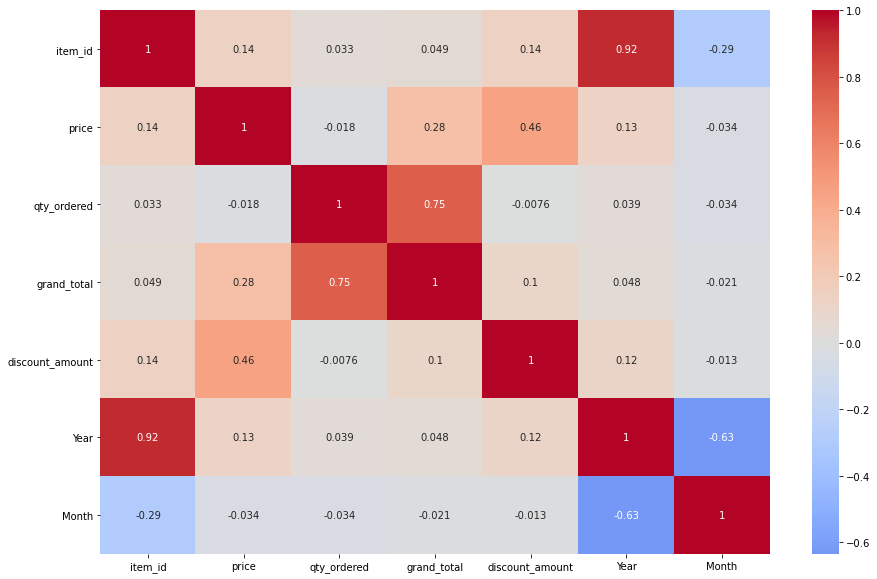

In [35]:
#checking for correlation which would help me in making charts
plt.figure(figsize=(15,10)) 
sns.color_palette(as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center = 0)